In [1]:
import torch
import numpy as np
import matplotlib.pylab as plt
from IPython.display import clear_output
import torch.nn as nn 

import pipeline
import consts
import plot
plot.prepare_for_plots()

/usr/local/lib/python3.8/dist-packages/pandas/compat/_optional.py:149: UserWarning: Pandas requires version '1.3.1' or newer of 'bottleneck' (version '1.2.1' currently installed).
  warnings.warn(msg, UserWarning)


Using cuda device


<Figure size 864x720 with 0 Axes>

In [2]:
train_dataloader, test_dataloader = pipeline.get_data()

# Full-class teacher training

In [3]:
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
mask = torch.ones(10).to(consts.device)
for i in range(consts.num_repeats):
    clear_output()
    print(f"Model {i+1}\n-------------------------------"
                      "\n-------------------------------")

    torch.manual_seed(i)

    model = pipeline.make_teacher_model()
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=consts.full_teacher_learning_rate)
    
    for epoch in range(consts.full_teacher_training_epochs):
        print(f"Epoch {epoch+1}\n-------------------------------")

        pipeline.train_loop(model,  history, mask, train_dataloader, loss_fn, optimizer)
        pipeline.test_loop(model, history, mask, test_dataloader, loss_fn)

    torch.save(model.state_dict(), pipeline.get_path()+f'/teacher_{i}.pt')

Model 10
-------------------------------
-------------------------------
Epoch 1
-------------------------------


Validation accuracy: 62.5%, Validation loss: 1.214676 

Epoch 2
-------------------------------


Validation accuracy: 67.9%, Validation loss: 0.939504 

Epoch 3
-------------------------------


Validation accuracy: 72.3%, Validation loss: 0.836994 

Epoch 4
-------------------------------


Validation accuracy: 74.2%, Validation loss: 0.776440 

Epoch 5
-------------------------------


Validation accuracy: 75.2%, Validation loss: 0.738996 

Epoch 6
-------------------------------


Validation accuracy: 76.0%, Validation loss: 0.714340 

Epoch 7
-------------------------------


Validation accuracy: 76.4%, Validation loss: 0.697319 

Epoch 8
-------------------------------


Validation accuracy: 76.8%, Validation loss: 0.684737 

Epoch 9
-------------------------------


Validation accuracy: 77.1%, Validation loss: 0.674760 

Epoch 10
-------------------------------


Validation accuracy: 77.3%, Validation loss: 0.666429 

Epoch 11
-------------------------------


Validation accuracy: 77.5%, Validation loss: 0.659312 

Epoch 12
-------------------------------


Validation accuracy: 77.7%, Validation loss: 0.652683 

Epoch 13
-------------------------------


Validation accuracy: 77.8%, Validation loss: 0.646894 

Epoch 14
-------------------------------


Validation accuracy: 78.0%, Validation loss: 0.641440 

Epoch 15
-------------------------------


Validation accuracy: 78.2%, Validation loss: 0.636449 

Epoch 16
-------------------------------


Validation accuracy: 78.2%, Validation loss: 0.631975 

Epoch 17
-------------------------------


Validation accuracy: 78.5%, Validation loss: 0.628023 

Epoch 18
-------------------------------


Validation accuracy: 78.5%, Validation loss: 0.624101 

Epoch 19
-------------------------------


Validation accuracy: 78.7%, Validation loss: 0.620532 

Epoch 20
-------------------------------


Validation accuracy: 78.8%, Validation loss: 0.617054 

Epoch 21
-------------------------------


Validation accuracy: 79.0%, Validation loss: 0.614157 

Epoch 22
-------------------------------


Validation accuracy: 79.0%, Validation loss: 0.611203 

Epoch 23
-------------------------------


Validation accuracy: 79.1%, Validation loss: 0.608439 

Epoch 24
-------------------------------


Validation accuracy: 79.2%, Validation loss: 0.605744 

Epoch 25
-------------------------------


Validation accuracy: 79.3%, Validation loss: 0.603470 

Epoch 26
-------------------------------


Validation accuracy: 79.4%, Validation loss: 0.601111 

Epoch 27
-------------------------------


Validation accuracy: 79.5%, Validation loss: 0.599005 

Epoch 28
-------------------------------


Validation accuracy: 79.5%, Validation loss: 0.596925 

Epoch 29
-------------------------------


Validation accuracy: 79.7%, Validation loss: 0.594919 

Epoch 30
-------------------------------


Validation accuracy: 79.8%, Validation loss: 0.592986 

Epoch 31
-------------------------------


Validation accuracy: 79.8%, Validation loss: 0.591090 

Epoch 32
-------------------------------


Validation accuracy: 79.9%, Validation loss: 0.589551 

Epoch 33
-------------------------------


Validation accuracy: 79.9%, Validation loss: 0.587899 

Epoch 34
-------------------------------


Validation accuracy: 79.9%, Validation loss: 0.586462 

Epoch 35
-------------------------------


Validation accuracy: 80.0%, Validation loss: 0.584706 

Epoch 36
-------------------------------


Validation accuracy: 80.0%, Validation loss: 0.583143 

Epoch 37
-------------------------------


Validation accuracy: 80.1%, Validation loss: 0.581635 

Epoch 38
-------------------------------


Validation accuracy: 80.1%, Validation loss: 0.580314 

Epoch 39
-------------------------------


Validation accuracy: 80.1%, Validation loss: 0.578910 

Epoch 40
-------------------------------


Validation accuracy: 80.1%, Validation loss: 0.577827 

Epoch 41
-------------------------------


Validation accuracy: 80.1%, Validation loss: 0.576352 

Epoch 42
-------------------------------


Validation accuracy: 80.2%, Validation loss: 0.575263 

Epoch 43
-------------------------------


Validation accuracy: 80.2%, Validation loss: 0.574160 

Epoch 44
-------------------------------


Validation accuracy: 80.2%, Validation loss: 0.573152 

Epoch 45
-------------------------------


Validation accuracy: 80.3%, Validation loss: 0.572134 

Epoch 46
-------------------------------


Validation accuracy: 80.3%, Validation loss: 0.571238 

Epoch 47
-------------------------------


Validation accuracy: 80.4%, Validation loss: 0.570201 

Epoch 48
-------------------------------


Validation accuracy: 80.4%, Validation loss: 0.569417 

Epoch 49
-------------------------------


Validation accuracy: 80.4%, Validation loss: 0.568536 

Epoch 50
-------------------------------


Validation accuracy: 80.4%, Validation loss: 0.567995 



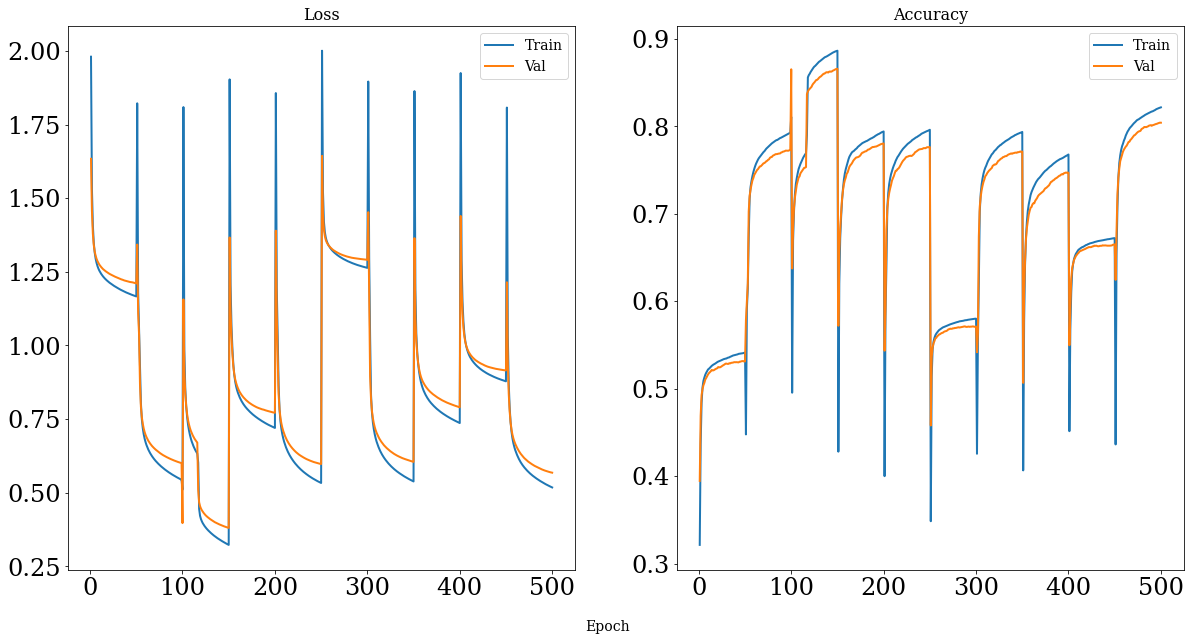

In [4]:
plot.plot_history(history, consts.full_teacher_training_epochs, consts.num_repeats)

# 5-class teachers trainig

In [5]:
# classes 0 to 4
mask = torch.tensor([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=torch.float).to(consts.device)
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

loss_fn = nn.CrossEntropyLoss(weight=mask)

for i in range(consts.num_repeats):
    clear_output()

    print(f"Model {i+1}\n-------------------------------"
                      "\n-------------------------------")

    torch.manual_seed(i)

    model = pipeline.make_teacher_model()
    optimizer = torch.optim.Adam(model.parameters(), lr=consts.teacher_5_learning_rate)
   

    for epoch in range(consts.teacher_5_training_epochs):
        print(f"Epoch {epoch+1}\n-------------------------------")

        pipeline.train_loop(model,  history, mask, train_dataloader, loss_fn, optimizer)
        pipeline.test_loop(model, history, mask, test_dataloader, loss_fn)

    torch.save(model.state_dict(), pipeline.get_path()+f'/teacher_5cl_{i}.pt')

Model 10
-------------------------------
-------------------------------
Epoch 1
-------------------------------


Validation accuracy: 69.9%, Validation loss: 1.062513 

Epoch 2
-------------------------------


Validation accuracy: 72.0%, Validation loss: 0.882045 

Epoch 3
-------------------------------


Validation accuracy: 72.5%, Validation loss: 0.835734 

Epoch 4
-------------------------------


Validation accuracy: 73.3%, Validation loss: 0.813044 

Epoch 5
-------------------------------


Validation accuracy: 73.7%, Validation loss: 0.799783 

Epoch 6
-------------------------------


Validation accuracy: 73.8%, Validation loss: 0.790998 

Epoch 7
-------------------------------


Validation accuracy: 73.9%, Validation loss: 0.784908 

Epoch 8
-------------------------------


Validation accuracy: 74.1%, Validation loss: 0.779665 

Epoch 9
-------------------------------


Validation accuracy: 74.2%, Validation loss: 0.775265 

Epoch 10
-------------------------------


Validation accuracy: 74.3%, Validation loss: 0.771368 

Epoch 11
-------------------------------


Validation accuracy: 74.3%, Validation loss: 0.768175 

Epoch 12
-------------------------------


Validation accuracy: 74.5%, Validation loss: 0.765289 

Epoch 13
-------------------------------


Validation accuracy: 74.5%, Validation loss: 0.762424 

Epoch 14
-------------------------------


Validation accuracy: 74.6%, Validation loss: 0.759933 

Epoch 15
-------------------------------


Validation accuracy: 74.6%, Validation loss: 0.757671 

Epoch 16
-------------------------------


Validation accuracy: 74.6%, Validation loss: 0.755302 

Epoch 17
-------------------------------


Validation accuracy: 74.6%, Validation loss: 0.752991 

Epoch 18
-------------------------------


Validation accuracy: 74.6%, Validation loss: 0.750868 

Epoch 19
-------------------------------


Validation accuracy: 74.6%, Validation loss: 0.748807 

Epoch 20
-------------------------------


Validation accuracy: 74.6%, Validation loss: 0.746942 

Epoch 21
-------------------------------


Validation accuracy: 74.8%, Validation loss: 0.744986 

Epoch 22
-------------------------------


Validation accuracy: 74.8%, Validation loss: 0.743466 

Epoch 23
-------------------------------


Validation accuracy: 74.8%, Validation loss: 0.742052 

Epoch 24
-------------------------------


Validation accuracy: 74.8%, Validation loss: 0.740563 

Epoch 25
-------------------------------


Validation accuracy: 74.8%, Validation loss: 0.739478 

Epoch 26
-------------------------------


Validation accuracy: 74.8%, Validation loss: 0.737933 

Epoch 27
-------------------------------


Validation accuracy: 74.9%, Validation loss: 0.736971 

Epoch 28
-------------------------------


Validation accuracy: 74.9%, Validation loss: 0.735730 

Epoch 29
-------------------------------


Validation accuracy: 74.9%, Validation loss: 0.734308 

Epoch 30
-------------------------------


Validation accuracy: 74.9%, Validation loss: 0.733278 



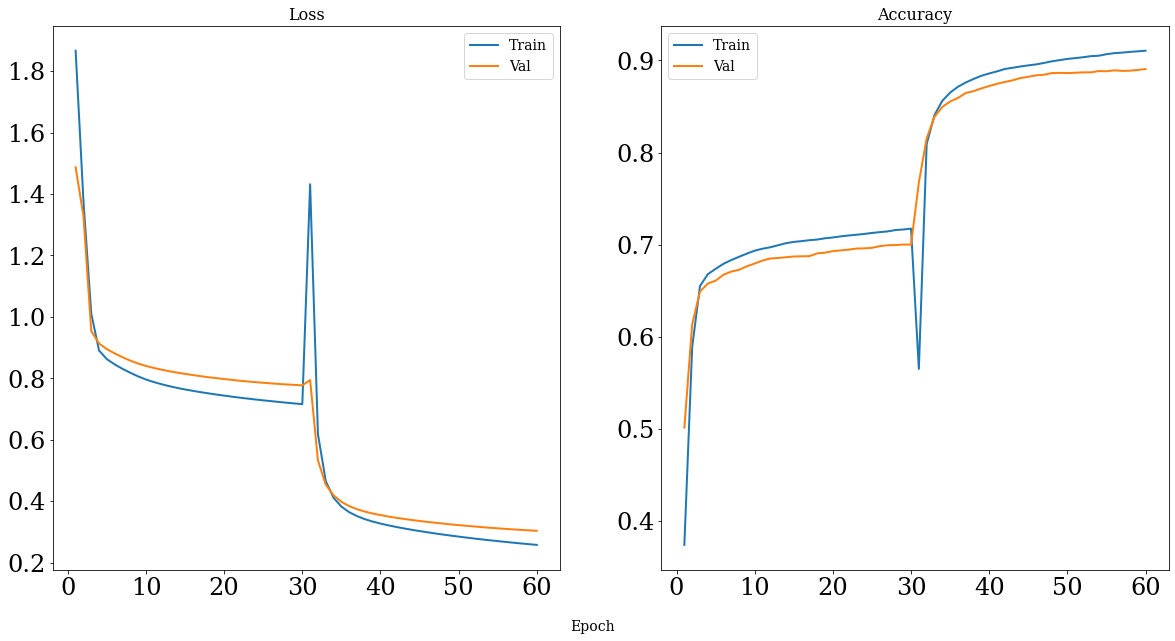

In [7]:
plot.plot_history(history, consts.teacher_5_training_epochs, consts.num_repeats)